## Assignment 1

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of 
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

Present your answers with plots and/or math. (20 points)

In [2]:
import numpy as np
from copy import deepcopy
from neurodynex3.hopfield_network import plot_tools
import matplotlib.pyplot as plt

In [3]:
# Function to calculate the retrieval accuracy
def calculate_accuracy(original, retrieved):
    return np.mean(original == retrieved)

def get_patterns(size, num_patterns):
    patterns = []
    for _ in range(num_patterns):
        pattern = np.random.choice([0, 1], size=(size, size))
        patterns.append(pattern)
    return patterns

# Introducing noise to the new created deepcopy "cue"
def perturb_pattern(pattern, num_flips):
    # Creates a shallow copy
    noisy_pattern = pattern.copy()
    flat_pattern = noisy_pattern.flatten()
    indices = np.random.choice(len(flat_pattern), num_flips, replace=False)
    flat_pattern[indices] = 1 - flat_pattern[indices]
    noisy_pattern = flat_pattern.reshape(pattern.shape)
    return noisy_pattern

def calculate_weights(plist, psize):
    # Creates 16 neurons corresponding to pixels of pattern
    nr_neurons = psize**2
    # Creates 16X16 weight matrix to hold wieghts of neurons
    wghts = np.zeros((nr_neurons, nr_neurons))

    for pattern in plist:
        pattern = pattern.flatten()
        pattern = pattern.reshape((nr_neurons, 1))
        wghts += np.dot(pattern, pattern.T)
    
    # Removing self connections
    wghts -= len(plist) * np.eye(nr_neurons)
    return wghts

def network_evolution(pnoisy, wghts):
    # noisy pattern converted into 16X1 vector
    pnoisy_flat = pnoisy.flatten()
    updated_pnoisy = np.dot(pnoisy_flat, wghts)
    updated_pnoisy = (updated_pnoisy > 0).astype(int)
    return updated_pnoisy.reshape(pnoisy.shape)


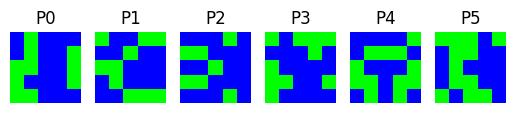

In [4]:
pattern_size = 5
no_of_patterns = 6
# Number of flips to perturb the cue
no_of_flips = [1, 2, 3, 4]

pattern_list = get_patterns(pattern_size, no_of_patterns)
# Plotting original patterns
plot_tools.plot_pattern_list(pattern_list)

In [6]:
weights = calculate_weights(pattern_list, pattern_size)
# print(weights)

# Creating a deep level copy of our pattern list
cue = deepcopy(pattern_list)

# Storing result
accuracies = []

for num_flips in no_of_flips:
    initial_state = perturb_pattern(cue[0], num_flips)
    state_list = [initial_state]

    for _ in range(3):
        new_state = network_evolution(state_list[-1], weights)
        state_list.append(new_state)
    
    final_state = state_list[-1]
    accuracy = calculate_accuracy(cue[0], final_state)
    accuracies.append(accuracy)

print(accuracies)

[0.44, 0.44, 0.44, 0.44]


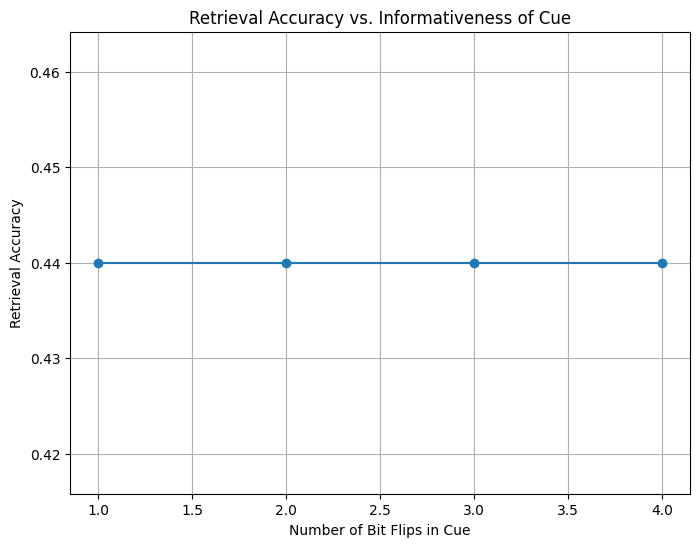

In [7]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(no_of_flips, accuracies, marker='o')
plt.title('Retrieval Accuracy vs. Informativeness of Cue')
plt.xlabel('Number of Bit Flips in Cue')
plt.ylabel('Retrieval Accuracy')
plt.grid(True)
plt.show()

In [8]:
# Number of patterns stored
num_patterns_list = [2, 4, 6, 8]
# Storing results
accuracies = []

for num_patterns in num_patterns_list:
    patterns = get_patterns(pattern_size, num_patterns)
    weights = calculate_weights(patterns, pattern_size)

    initial_state = perturb_pattern(patterns[0], 3)
    state_list = [initial_state]

    for _ in range(3):
        new_state = network_evolution(state_list[-1], weights)
        state_list.append(new_state)

    final_state = state_list[-1]
    accuracy = calculate_accuracy(patterns[0], final_state)
    accuracies.append(accuracy)

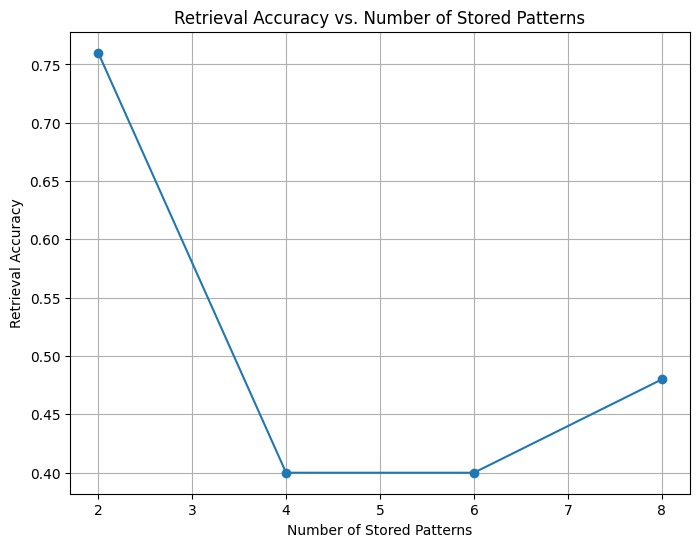

In [9]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(num_patterns_list, accuracies, marker='o')
plt.title('Retrieval Accuracy vs. Number of Stored Patterns')
plt.xlabel('Number of Stored Patterns')
plt.ylabel('Retrieval Accuracy')
plt.grid(True)
plt.show()

In [10]:
# Pattern sizes (network sizes)
pattern_size_list = [2, 4, 6]

# Storing results
accuracies = []

for size in pattern_size_list:
    patterns = get_patterns(size, num_patterns)
    weights = calculate_weights(patterns, size)

    initial_state = perturb_pattern(patterns[0], 3)
    state_list = [initial_state]

    for _ in range(3):
        new_state = network_evolution(state_list[-1], weights)
        state_list.append(new_state)

    final_state = state_list[-1]
    accuracy = calculate_accuracy(patterns[0], final_state)
    accuracies.append(accuracy)

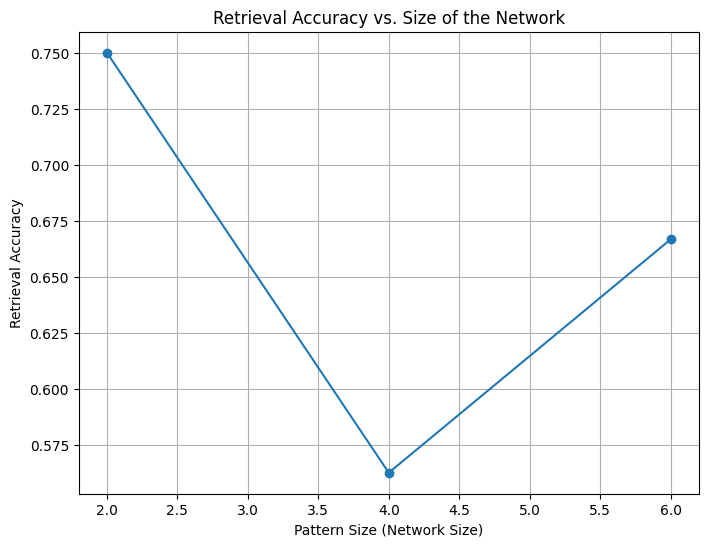

In [11]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(pattern_size_list, accuracies, marker='o')
plt.title('Retrieval Accuracy vs. Size of the Network')
plt.xlabel('Pattern Size (Network Size)')
plt.ylabel('Retrieval Accuracy')
plt.grid(True)
plt.show()